Preparar o arquivo eliminando as ultimas 7 linhas

IMPORTAÇÕES

In [1]:
import pandas as pd  # Importação do pandas
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split  # Importação do train_test_split
import matplotlib.pyplot as plt  # Importação do matplotlib
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split , KFold, cross_val_score # usar este ou
from sklearn import model_selection  # este ? olhar o video do professor aula 2 começo do video 14:00
import numpy as np
from sklearn.preprocessing import StandardScaler

Função Para preparar os dados.

Remove colunas de acordo com o Dataset e sempre remove linhas que tiverem pelo menos um dado faltando.

In [2]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    if(file_path == 'Student_performance_data _.csv'):
        df = df.drop(columns=['StudentID'])

    if(file_path == 'alzheimers_disease_data.csv'):
        df = df.drop(columns=['PatientID'])
        df = df.drop(columns=['DoctorInCharge'])

    if(file_path == 'UCI_Credit_Card.csv'):
        df = df.drop(columns=['ID'])
    
    if(file_path == 'Deepression.csv'):
        df = df.drop(columns=['Number'])

    if(file_path == 'cancer.csv'):
        df = df.drop(columns=['Unnamed: 32'])
        df = df.drop(columns=['id'])

    missing_values = df.isnull().sum()

    if missing_values.any():
        df_cleaned = df.dropna()
        print("Linhas com valores ausentes foram removidas.")
    else:
        df_cleaned = df

    return df_cleaned

Função para determinar qual é a coluna de rótulo:

No geral, a label column é a última, mas pode variar dependendo do dataset

In [3]:
def detect_label_column(df, file_path):
    if(file_path == 'cancer.csv'):
        label_column = df.columns[0]
    else:
        label_column = df.columns[-1]

    return label_column


Função para transformar os dados da label em inteiros.

Essa função serve para transformar os dados da label em inteiros, caso eles sejam String.

In [4]:
def encode_labels(y):
    if y.dtype == 'object':
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
    else:
        y_encoded = y
    
    return y_encoded

Função que faz aplica Arvore de Decisão

basicamente a função recebe um dataset e aplica regressão logística usando K-Folds

In [5]:
def run_tree_decision(file_path):
    # Carrega e prepara os dados
    df = load_and_prepare_data(file_path)
    
    label_column = detect_label_column(df, file_path)

    X = df.drop(columns=[label_column])
    y = df[label_column]

    y_encoded = encode_labels(y)

    accuracies = []
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    decidion_tree = tree.DecisionTreeClassifier()

    kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X_scaled, y_encoded):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        
    
        # Treinar o modelo
        decidion_tree.fit(X_train, y_train)
        
    
        # Avaliar a precisão do modelo
        accuracy = decidion_tree.score(X_test, y_test)
        accuracies.append(accuracy)

    print(f"Acurácias de cada fold: {accuracies}")
    mean_accuracy = np.mean(accuracies)


    return mean_accuracy


Função responsável principal

Essa função é a responsável por chamar a função que aplica regressão logística para todos os datasets e após isso, chama a função para plotar os gráficos

In [6]:
def mainTreeDecision(mean_accuracies, file_paths):
    for file_path in file_paths:
        mean_accuracy = run_tree_decision(file_path)
        mean_accuracies.append(mean_accuracy)

    for i, mean_accuracy in enumerate(mean_accuracies):
        print(f"Acurácia média para {file_paths[i]}: {mean_accuracy:.2f}")

    plot_mean_accuracy_graph(mean_accuracies, file_paths)


Função para desenhar os gráficos

Essa função recebe o vetor contendo a média das acurácias de cada dataset e plota isso em um gráfico

In [7]:
def plot_mean_accuracy_graph(mean_accuracies, file_paths):
    num_datasets = len(mean_accuracies)
    x_positions = np.arange(num_datasets)

    plt.bar(x_positions, mean_accuracies, color='blue')
    plt.xticks(x_positions, file_paths, rotation=45)
    plt.xlabel('Conjunto de Dados')
    plt.ylabel('Acurácia Média')
    plt.title('Acurácia Média do Classificador por Conjunto de Dados')
    plt.show()

Main:
Apenas inicializa as váriaveis e chama as funções necessárias

Acurácias de cada fold: [0.61875, 0.634375, 0.646875, 0.61875, 0.6363636363636364]
Acurácias de cada fold: [0.7272727272727273, 0.7272727272727273, 0.6948051948051948, 0.7320261437908496, 0.5947712418300654]
Acurácias de cada fold: [0.9298245614035088, 0.868421052631579, 0.9122807017543859, 0.9210526315789473, 0.9203539823008849]
Acurácias de cada fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Acurácias de cada fold: [0.7216666666666667, 0.7323333333333333, 0.734, 0.7348333333333333, 0.72]
Acurácias de cada fold: [0.4166666666666667, 0.3611111111111111, 0.42592592592592593, 0.4722222222222222, 0.5185185185185185]
Acurácias de cada fold: [0.824634655532359, 0.826722338204593, 0.8305439330543933, 0.8347280334728033, 0.8326359832635983]
Acurácias de cada fold: [0.9046511627906977, 0.9093023255813953, 0.8744186046511628, 0.9162790697674419, 0.8997668997668997]
Acurácia média para winequality-red.csv: 0.63
Acurácia média para diabetes.csv: 0.70
Acurácia média para cancer.csv: 0.91
Acurácia média para hear

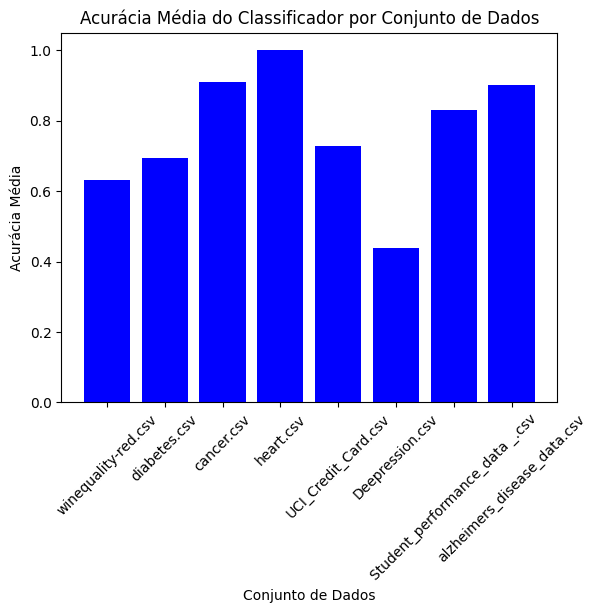

In [8]:
file_paths = ['winequality-red.csv', 'diabetes.csv', 'cancer.csv', 'heart.csv', 'UCI_Credit_Card.csv', 'Deepression.csv','Student_performance_data _.csv', 'alzheimers_disease_data.csv']
mean_accuracies = []


mainTreeDecision(mean_accuracies, file_paths)
